# Project-2: Auction pricing of players in the Indian premier league (IPL)
**(Multiple Linear Regression)**

- Multiple  linear  regression  (MLR)  is  a  supervised  learning  algorithm  for  finding  the  existence  of  an  association relationship between a dependent variable (aka response variable or outcome variable) and several independent variables (aka explanatory variables or predictor variable or features).

- The functional form of MLR is given by:

    $Y_i =  \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + .... + + \beta_k X_{ki} + \epsilon_{ki}$

    where

    $\beta_1$,  $\beta_2$, $\beta_3$, .... , $\beta_k$ are partial regression coefficients. 

    - X = independent variables (aka explanatory variables or predictor variable or features)
    - Y = dependent variable (aka response variable or outcome variable)<br>

- Since the relationship between an explanatory variable and the response (outcome) variable is calculated after removing (or controlling) the effect all the other explanatory variables (features) in the model.

- The assumptions that are made in multiple linear regression model are as follows:
    1. **Linearity:** The regression model is linear in regression parameters (b-values).
    2. **Normal distribution:** The residuals follow a normal distribution and the expected value (mean) of the residuals is zero.
    3. **Uncorrelated residuals:** In time series data, residuals are assumed to uncorrelated.
    4. **Variance of the residuals** The variance of the residuals is constant for all values of $X_i$. When the variance of the residuals is constant for different values of $X_i$, it is called homoscedasticity. A non-constant variance of residuals is called heteroscedasticity.
    5. **Correlation between independent variables:** There is no high correlation between independent variables in the model (called multi-collinearity). Multi-collinearity can destabilize the model and can result in an incorrect estimation of the regression parameters.

    The partial regressions coefficients are estimated by minimizing the sum of squared errors (SSE).

## Objective: Predicting the SOLD PRICE (Auction Price) of Players

The Indian Premier League (IPL) is a professional league for Twenty20 (T20) cricket championships that  was started in 2008 in India. IPL was initiated by the BCCI with eight franchises comprising players from  across  the  world.  The  first  IPL  auction  was  held  in  2008  for  ownership  of  the  teams  for  10  years,  with  a base price of USD 50 million. The franchises acquire players through an English auction that is con- ducted every year. However, there are several rules imposed by the IPL. For example, only international  players and popular Indian players are auctioned.

The performance of the players could be measured through several metrics. Although the IPL fol- lows the Twenty20 format of the game, it is possible that the performance of the players in the other formats of the game such as Test and One-Day matches could influence player pricing. A few players had excellent records in Test matches, but their records in Twenty20 matches were not very impressive. The performances of 130 players who played in at least one season of the IPL (2008−2011) measured through various performance metrics 

### Data Code Description

| Data Code | Description |
|-----------|-------------|
| AGE | Age of the player at the time of auction classified into three categories. Category 1 (L25) means the player is less than 25 years old, category 2 means that the age is between 25 and 35 years (B25− 35) and category 3 means that the age is more than 35 (A35). |
| RUNS-S | Number of runs scored by a player. |
| RUNS-C | Number of runs conceded by a player. |
| HS | Highest score by a batsman in IPL. |
| AVE-B | Average runs scored by a batsman in IPL. |
| AVE-BL | Bowling average (number of runs conceded/number of wickets taken) in IPL. |
| SR-B | Batting strike rate (ratio of the number of runs scored to the number of balls faced) in IPL. |
| SR-BL | Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL. |
| SIXERS | Number of six runs scored by a player in IPL.|
| WKTS | Number of wickets taken by a player in IPL. |
| ECON | Economy rate of a bowler (number of runs conceded by the bowler per over) in IPL. |
| CAPTAINCY EXP | Captained either a T20 team or a national team.|
| ODI-SR-B | Batting strike rate in One-Day Internationals. |
| ODI-SR-BL | Bowling strike rate in One-Day Internationals. |
| ODI-RUNS-S | Runs scored in One-Day Internationals. |
| ODI-WKTS | Wickets taken in One-Day Internationals.|
| T-RUNS-S | Runs scored in Test matches. |
| T-WKTS | Wickets taken in Test matches. |
| PLAYER-SKILL | Player’s primary skill (batsman, bowler, or allrounder). |
| COUNTRY | Country of origin of the player (AUS: Australia; IND: India; PAK: Pakistan; SA: South Africa; SL: Sri Lanka; NZ: New Zealand; WI: West Indies; OTH: Other countries). |
| YEAR-A | Year of Auction in IPL. |
| IPL TEAM | CSK: Chennai Super Kings; DC: Deccan Chargers; DD: Delhi Dare- devils; KXI: Kings XI Punjab; KKR: Kolkata Knight Riders; MI: Mumbai Indians; PWI: Pune Warriors India; RR: Rajasthan Royals; RCB: Royal Challengers Bangalore |

*A + sign is used to indicate that the player has played for more than one team. For example, CSK+ would mean that the player has played for CSK as well as for one or more other teams.

## Data
- Data is available at in the repository.

## Developing Multiple Linear Regression Model Using Python

### Importing important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

np.set_printoptions(precision=4, linewidth=100)

### Data file path

In [2]:
# Provide the relative path to the data file
file_path = "../ml-data/IPL-IMB381IPL2013.csv"

### Importing the data file

In [6]:
# importing the data file

ipl_auction_df = pd.read_csv(file_path)

In [7]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [11]:
# shape of the dataframe
ipl_auction_df.shape

(130, 26)

There are 130 observations (records) and 26 columns (features) in the data, and there are no missing values.

In [9]:
# importing first 10 rows
ipl_auction_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


<AxesSubplot: xlabel='ODI-RUNS-S', ylabel='BASE PRICE'>

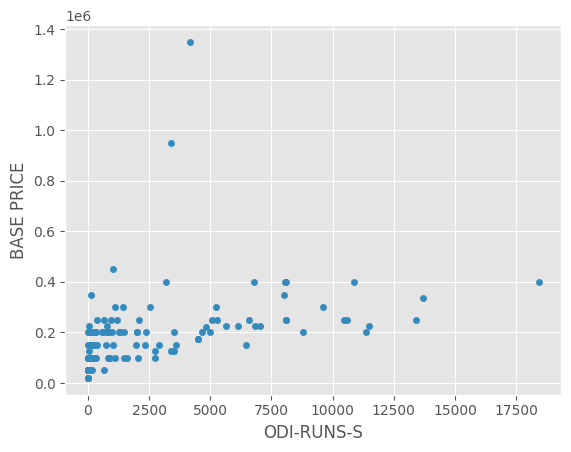

In [47]:
ipl_auction_df.plot.scatter(x='ODI-RUNS-S', y='BASE PRICE')

In [10]:
# displaying the initial 10 columns for the first 5 rows
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


## Building multiple linear regression model

- We can build a model to understand what features (`X`) of players are influencing their SOLD PRICE or predict the player’s auction prices in future. However, all columns are not features. 
- For example, Sl. NO. is just a serial number and cannot be considered a feature of the player. 
- We will build a model using only player’s statistics. So, BASE PRICE can also be removed. 
- We will create a variable `X_feature` which will contain the list of features that we will finally use for building the model and ignore rest of the columns of the DataFrame. 

### 1. Creating a feature columns

The following function is used for including the features in the model building.

In [16]:
# Assuming 'ipl_auction_df' is your DataFrame
column_names = ipl_auction_df.columns.tolist()
column_names

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

Not all columns are important. We select few of them to make our model for auction price. To do this, we create `X_features` list.

In [12]:
X_features = ipl_auction_df.columns

In [13]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 
              'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

### 2. Encoding Categorical Features

- Qualitative variables or categorical variables need to be encoded using dummy variables before incorporating them in the regression model. 
- If a categorical variable has `n` categories (e.g., the player role in the data has four categories, namely, batsman, bowler, wicket-keeper and allrounder), then we will need `n − 1` dummy variables. So, in the case of PLAYING ROLE, we will need **three dummy variables** since there are four categories.

In [18]:
# Finding unique values of column PLAYING ROLE
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [22]:
ipl_auction_df['COUNTRY'].unique()

array(['SA', 'BAN', 'IND', 'AUS', 'WI', 'SL', 'NZ', 'ENG', 'PAK', 'ZIM'], dtype=object)

The variable can be converted into four dummy variables. 
- Set the variable value to `1` to indicate the role of the player. 
- This can be done using `pd.get_dummies()` method. 
- We will create dummy variables for only PLAYING ROLE to understand and then create dummy variables for the rest of the categorical variables.


In [32]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5] 
#[0:5] is a slicing operation that selects the first five rows of the resulting DataFrame

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


As shown in the table above, the `pd.get_dummies()` method has created four dummy variables and has already set the variables to `1` as variable value in each sample.

- We must create dummy variables for all categorical (qualitative) variables present in the dataset.

In [33]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [34]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], 
                                        columns = categorical_features, 
                                        drop_first = True)

In [35]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

- The dataset contains the new dummy variables that have been created. 
- We can reassign the new features to the variable `X_features`, which we created earlier to keep track of all features that will be used to build the model finally.

In [38]:
X_features = ipl_auction_encoded_df.columns
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

### 3. Splitting the Dataset into Train and Validation Sets

- Before building the model, we will split the dataset into 80:20 ratio
- The split function allows using a parameter `random_state`, which is a seed function for reproducibility of randomness. This parameter is not required to be passed. 
- Setting this variable to a fixed number will make sure that the records that go into **training** and **test set** remain unchanged and hence the results can be reproduced. We will use the value 42 (it is again selected randomly). 

In [39]:
# Creating feature Set(X) and Outcome Variable (Y)
import statsmodels.api as sm
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']

In [40]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X , Y,
train_size = 0.8, random_state = 42 )

### 4. Fitting the Model

We will fit the model using OLS method and pass `train_y` and `train_X` as parameters.

In [42]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()

Printing Estimated Parameters and Interpreting Them

In [44]:
print(ipl_model_1.params)

const                     375827.199059
T-RUNS                       -53.789030
T-WKTS                      -132.596723
ODI-RUNS-S                    57.959956
ODI-SR-B                    -524.144970
ODI-WKTS                     815.394424
ODI-SR-BL                   -773.309199
RUNS-S                       114.720547
HS                         -5516.335398
AVE                        21560.275955
SR-B                       -1324.721784
SIXERS                      4264.100109
RUNS-C                        69.825020
WKTS                        3075.242189
AVE-BL                      5182.933487
ECON                       -6820.778058
SR-BL                      -7658.809364
AGE_2                    -230767.646329
AGE_3                    -216827.080829
COUNTRY_BAN              -122103.519643
COUNTRY_ENG               672410.765359
COUNTRY_IND               155306.401120
COUNTRY_NZ                194218.912037
COUNTRY_PAK                75921.766953
COUNTRY_SA                 64283.389419


#### Scatter Plot

In [ ]:
# Scatter plot of original data points
ipl_auction_df.plot.scatter(x='Percentage in Grade 10', y='Salary', label = 'Scatter plot')

# Generate predicted values using the linear regression coefficients
MBA_salary = mba_salary_lm.params[0]+mba_salary_lm.params[1]*mba_salary_df['Percentage in Grade 10']

# Plot the fitted line
plt.plot(mba_salary_df['Percentage in Grade 10'], MBA_salary, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Fitted Line')

# Add legend
plt.legend()

# Show the plot
plt.show()

### 5. Regression Model Summary Using Python

The function `summary2()` prints the model summary which contains the information required for diagnosing a regression model 

In [43]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2023-06-20 20:31        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------